In [9]:
# from google.colab import drive
# drive.mount('/content/drive')
# !cp 'drive/MyDrive/Colab Notebooks/Basic-principles-nn-pythorch/plot_functin.py' .

<div dir="rtl" lang="he" xml:lang="he">

#  מודלים ושכבות 
מודלים, שהם צירוף של כמה שכבות מהווים את הפונקציות אותם אנחנו רוצים לשפר. 

כאשר נרצה לפתח מוצר שמשתמש בבינה מלאכותית, ניצור מודל - שזה הפונקציה שתהיה המוצר הסופי, וסביב המודל כלים שיעזרו לנו לשפר את המודל.

<div dir="rtl" lang="he" xml:lang="he">


## יצירת מודל
מודל הוא שירשור של פונקציות, מורכבות ככול שיהיו, כל שיכבה היא בעצמה מודל?


<div dir="rtl" lang="he" xml:lang="he">


## יצירת מודל
מודל הוא שירשור של פונקציות, מורכבות ככול שיהיו, כל שיכבה היא בעצמה מודל?


In [10]:
import torch
import matplotlib.pyplot as plt
from plot_functin import plot_3d_model


<div dir="rtl" lang="he" xml:lang="he">


## יצירת מודל
מודל הוא שירשור של פונקציות, מורכבות ככול שיהיו, כל שיכבה היא בעצמה מודל?


In [11]:
import torch

conv_1 = torch.nn.Conv2d(1, 6, 5)
conv_2 = torch.nn.Conv2d(6, 16, 5)
max_pool_1 = torch.nn.MaxPool2d(2)
max_pool_2 = torch.nn.MaxPool2d(2)
linear_1 = torch.nn.Linear(16 * 5 * 5, 120)
linear_2 = torch.nn.Linear(120, 84)
linear_3 = torch.nn.Linear(84, 10)
activate_1 = torch.nn.ReLU()
activate_2 = torch.nn.ReLU()


def model(input_data):
    y = max_pool_1(input_data)
    y = conv_1(y)
    y = max_pool_2(y)
    y = conv_2(y)
    y = linear_1(y)
    y = activate_1(y)
    y = linear_2(y)
    y = activate_2(y)
    y = linear_3(y)
    return y


In [12]:
x = torch.rand((100, 400, 120))


<div dir="rtl" lang="he" xml:lang="he">

### שכבה ליניארית
שיכבה ליניארית היא פונקציה אפינית 

$$
\\ \text{Lin}:ℝ^i\to ℝ^o
\\ \text{Lin}(x) = Wx+b
$$


ע"מ שהשכבה תיהיה מוגדרת גם על אוסף של וקטורים , כותבים אותה מעט שונה 
$$
\\ \text{Lin}:(ℝ^i)^n\to (ℝ^o)^n
\\ \text{Lin}(x) = xW.T+b  
$$


In [13]:
lin_layer = torch.nn.Linear(2, 2)

x = torch.rand(10, 2)
print(
    f"""
{x=},
{lin_layer(x)=}
"""
)



x=tensor([[0.3441, 0.0318],
        [0.7019, 0.3266],
        [0.1850, 0.2081],
        [0.5638, 0.5948],
        [0.9930, 0.7167],
        [0.4031, 0.4120],
        [0.6115, 0.8171],
        [0.3502, 0.3727],
        [0.8601, 0.1664],
        [0.7116, 0.0021]]),
lin_layer(x)=tensor([[ 0.5607, -0.4875],
        [ 0.3937, -0.4140],
        [ 0.4924, -0.3727],
        [ 0.2810, -0.2590],
        [ 0.1881, -0.2821],
        [ 0.3794, -0.3162],
        [ 0.1739, -0.1614],
        [ 0.4021, -0.3251],
        [ 0.4545, -0.5210],
        [ 0.5433, -0.5716]], grad_fn=<AddmmBackward0>)



In [14]:
W = lin_layer.weight.data
b = lin_layer.bias.data
print(
    f"""
{x=},
{W=},
{b=},
{x@W.T+b=},
"""
)



x=tensor([[0.3441, 0.0318],
        [0.7019, 0.3266],
        [0.1850, 0.2081],
        [0.5638, 0.5948],
        [0.9930, 0.7167],
        [0.4031, 0.4120],
        [0.6115, 0.8171],
        [0.3502, 0.3727],
        [0.8601, 0.1664],
        [0.7116, 0.0021]]),
W=tensor([[-0.0847, -0.4636],
        [-0.1900,  0.4800]]),
b=tensor([ 0.6046, -0.4374]),
x@W.T+b=tensor([[ 0.5607, -0.4875],
        [ 0.3937, -0.4140],
        [ 0.4924, -0.3727],
        [ 0.2810, -0.2590],
        [ 0.1881, -0.2821],
        [ 0.3794, -0.3162],
        [ 0.1739, -0.1614],
        [ 0.4021, -0.3251],
        [ 0.4545, -0.5210],
        [ 0.5433, -0.5716]]),



<div dir="rtl" lang="he" xml:lang="he">
אפשר לראות כל שיכבה ליניארית כתת מרחב אפיני. 
ב
$R$
זה יראה ככה:

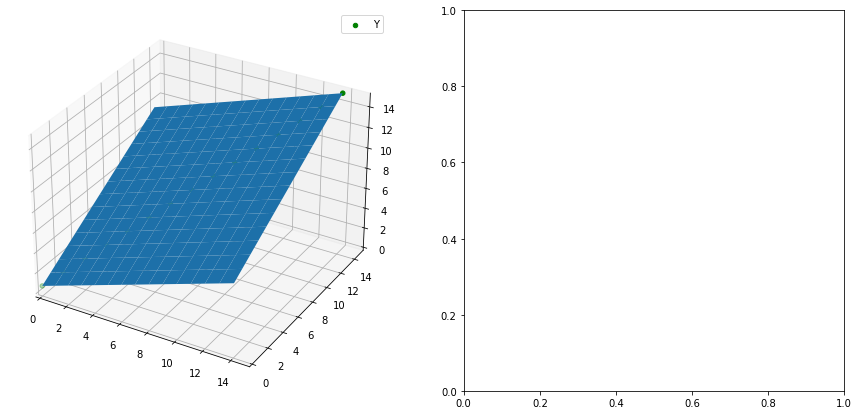

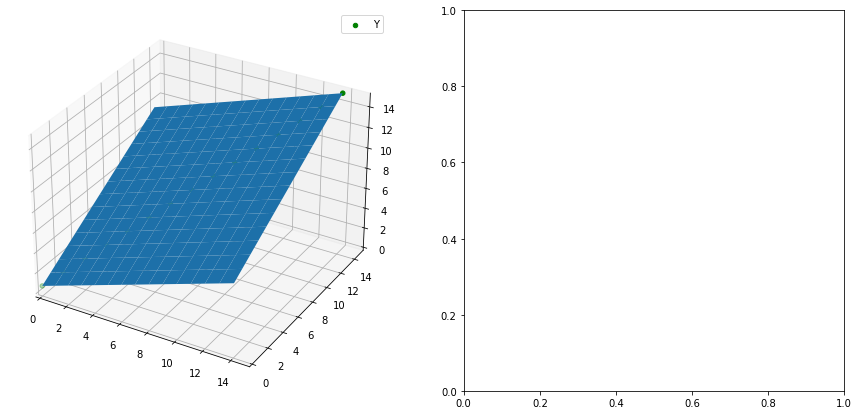

In [15]:
lin_layer = torch.nn.Linear(2, 1)
cordinnet = [[num, num] for num in range(15)]
x = torch.tensor(cordinnet, dtype=torch.float32)
y = lin_layer(x).detach()
plot_3d_model(lin_layer, x, y)


<div dir="rtl" lang="he" xml:lang="he">

### שיכבת אקטיבציה

שיכבת אקטיבציה היא פונקציה (לא לינארית ע"פ רוב) שמופעלת על הקלט. בדרך כלל נרכיב שיכבה לינארית ושיכבת אקטיבציה ביחד, כך נקבל רשת שיכולה לקרב לא רק פונקציות ליניאריות. (כי הרכבה של פונקציות ליניאריות ליניארית)


C:\Users\avrey\AppData\Local\Temp\ipykernel_10364\3900114763.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  ax.plot(x, func(x).detach(), label=label)


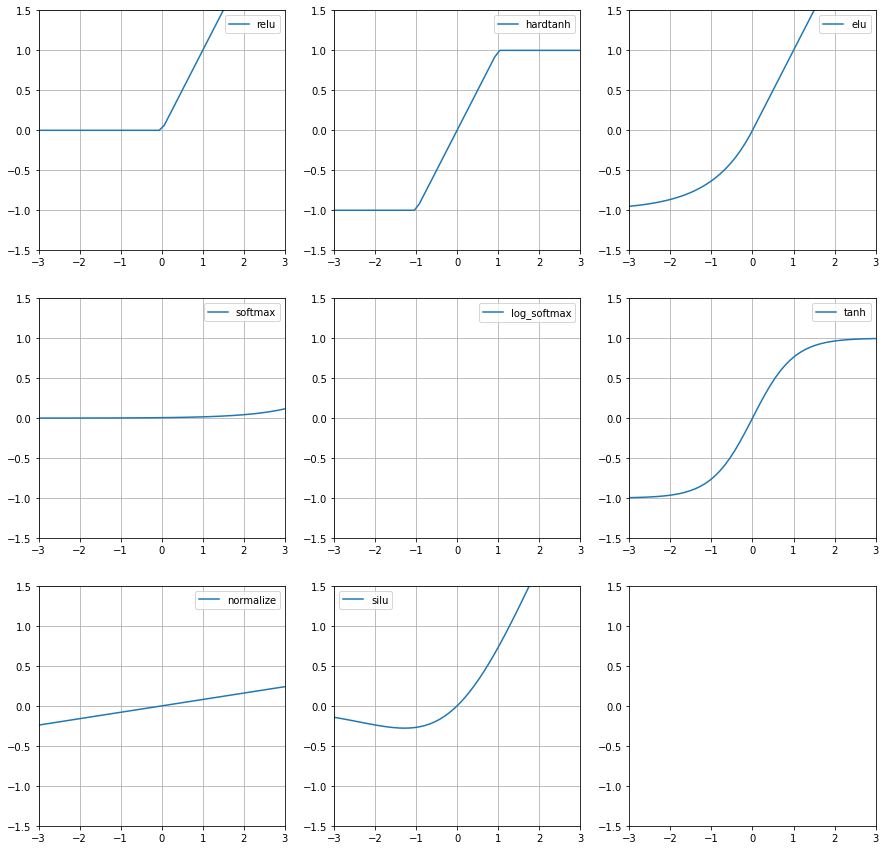

In [16]:
fig, axis = plt.subplots(3, 3, figsize=(15, 15))
plt.setp(axis, xlim=(-3, 3), ylim=(-1.5, 1.5))
activate_functions = {
    "relu": (torch.nn.functional.relu, axis[0][0]),
    "hardtanh": (torch.nn.functional.hardtanh, axis[0][1]),
    "elu": (torch.nn.functional.elu, axis[0][2]),
    "softmax": (torch.nn.functional.softmax, axis[1][0]),
    "log_softmax": (lambda x: torch.nn.functional.log_softmax(x, dim=0), axis[1][1]),
    "tanh": (torch.tanh, axis[1][2]),
    "normalize": (lambda x: torch.nn.functional.normalize(x, dim=0), axis[2][0]),
    "silu": (torch.nn.functional.silu, axis[2][1]),
}
x = torch.linspace(-3, 3, 50)
for label, func_and_ax in activate_functions.items():
    func = func_and_ax[0]
    ax = func_and_ax[1]
    ax.plot(x, func(x).detach(), label=label)
    ax.grid(True)
    ax.legend()


<div dir="rtl" lang="he" xml:lang="he">

### שיכבת הטמעה  Embedding Layer 

שכבת הטמעה לוקחת יצוג של מילה שהוא מספר בודד ומציגה אותו כוקטור מספרים. 
יצוג מאפשר למפות מילים למספרים בצורה יותר חכמה, לדוגמה, מילים דומות יכולות להיות קרובות מבחינה וקטורית

<div dir="rtl" lang="he" xml:lang="he">

#### הפיכת מילים לטוקנים ויצירת אוצר מילים

In [17]:
from torchtext import vocab
sentence_1 = "הוא הלך לפארק"
sentence_2 = "הם נסעו לבית"
sentence_3 = "אבא ילך לחנות"
sentence_4 = "היא הגיעה לבית-ספר"
sentences = [sentence_1, sentence_2, sentence_3, sentence_4]
words = " ".join(sentences).split()
dictionary = vocab.vocab({words[i]:i+1 for i in range(len(words))})
dictionary.set_default_index(0)

words = ['טעים','צבעוני','משעמם','יפה','בתוך','מתי','איך','האם']
dictionary = vocab.vocab({words[i]:i+1 for i in range(len(words))})
dictionary.set_default_index(0)

In [18]:
print(dictionary(sentence_1.split()))
print(dictionary(sentence_4.split()))

[0, 0, 0]
[0, 0, 0]


In [19]:
embedding = torch.nn.Embedding(len(words),2)
senten_as_num = torch.tensor(dictionary(sentence_1.split()))
senten_as_vecotr = embedding(senten_as_num)
print(f"""
{senten_as_num=},
{senten_as_vecotr=}
""")


senten_as_num=tensor([0, 0, 0]),
senten_as_vecotr=tensor([[0.2231, 1.0862],
        [0.2231, 1.0862],
        [0.2231, 1.0862]], grad_fn=<EmbeddingBackward0>)



<div dir="rtl" lang="he" xml:lang="he">

#### שכבת הטמעה 
כל מילה שמיוצגת ע"י מספר יחיד תיוצג כעת ע"י וקטור של שני מספרים, כך נוכל למקם מילים קרובות ביחד

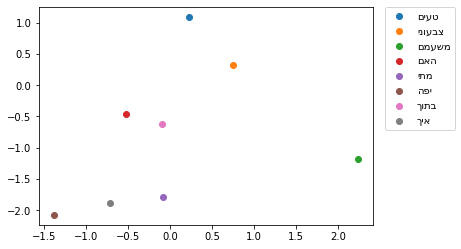

In [20]:
fig,axis = plt.subplots(1)
for word in dictionary.get_stoi():
    word_token = torch.tensor(dictionary([word]))
    word_vector = embedding(word_token).detach()[0]
    axis.scatter(*word_vector,label= word[::-1])   # reverse the word becuase is hebrow
fig.legend(bbox_to_anchor=(1.1, 0.9))

<div dir="rtl" lang="he" xml:lang="he">

### שיכבת קונבולוציה

<div dir="rtl" lang="he" xml:lang="he">

## הרכבת שכבות

<div dir="rtl" lang="he" xml:lang="he">

### שיכבה לינארית ופונקציית אקטיבציה - _Perceptron_

<div dir="rtl" lang="he" xml:lang="he">

### הרכבת שכבות לזיהוי תמונה

<div dir="rtl" lang="he" xml:lang="he">

### הרכבת שכבות לעוד תפקיד?

<div dir="rtl" lang="he" xml:lang="he">

## יצירת מודל דרך ירושה מ`nn.models`

<div dir="rtl" lang="he" xml:lang="he">

##

<div dir="rtl" lang="he" xml:lang="he">
